In [28]:
import pandas as pd
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列

In [29]:
import pandas as pd

# 读入 CSV 文件
df = pd.read_csv('more_layer.csv')
# df = pd.read_csv('evaluate_seg.csv')

# df = df.drop(columns=['pbid'])
df = df[df['layers'] <= 20]
# df = df[df['classcial'] <= 500]
# df = df[df['in_constraints_probs'] >= 99]
grouped_df = df.groupby(['pkid', 'layers', 'variables', 'constraints', 'method'], as_index=False).agg({
    'iteration_count':'mean',
    'classcial':'mean',
    'run_times':'mean',
    "ARG": 'mean',
    'in_constraints_probs': 'mean',
    'best_solution_probs': 'mean',
})


## 分组并把组作为索引
pivot_df = grouped_df.pivot(index =['pkid', 'layers', 'variables','constraints'], columns='method', values=["ARG", 'best_solution_probs', 'classcial', 'run_times','iteration_count'])
# pivot_df = grouped_df.pivot(index =['pkid','variables','constraints'], columns='method', values=['best_solution_probs','in_constraints_probs',"ARG",'iteration_count'])

method_order = ['HeaSolver', 'PenaltySolver', 'ChocoSolver']
# method_order = ['HeaSolver', 'PenaltySolver', 'ChocoSolver', 'QtoSolver ', 'QtoSimplifySolver', 'QtoSimplifyDiscardSolver', 'QtoSimplifyDiscardSegmentedSolver']
# method_order = ['ChocoSolver', 'QtoSolver', 'QtoSimplifySolver', 'QtoSimplifyDiscardSolver']
# method_order = ['ChocoSolver']
# method_order = ['QtoSimplifyDiscardSegmentedSolver']
pivot_df = pivot_df.reindex(columns=pd.MultiIndex.from_product([['best_solution_probs',"ARG",'run_times','iteration_count', 'classcial'], method_order]))

pivot_df

best_solution_probs                \
                                            HeaSolver PenaltySolver   
pkid layers variables constraints                                     
0    1      6         3                      0.000000      2.811523   
     2      6         3                      0.474609      5.166016   
     3      6         3                      2.565430      7.884766   
     4      6         3                      4.608398      3.502930   
     5      6         3                      4.549805      6.520508   
     6      6         3                      4.826172      7.627930   
     7      6         3                      7.223633      6.868164   
     8      6         3                     15.190430      8.854492   
     9      6         3                      9.105469      6.455078   
     10     6         3                      9.659180      6.007812   
     11     6         3                      7.611328      6.161133   
     12     6         3                     13.056641      3.928711   
     13     6         3                     16.260742      5.313477   
     14     6         3                      9.791016      5.190430   
     15     6         3                     12.970703      5.583008   
     16     6         3                      6.243164      4.661133   
     17     6         3                      9.985352      4.297852   
     18     6         3                     11.897461      7.992188   
     19     6         3                     10.041992      4.565430   
     20     6         3                      8.586914      5.243164   

                                                     ARG                \
                                  ChocoSolver  HeaSolver PenaltySolver   
pkid layers variables constraints                                        
0    1      6         3             49.973633   1.277500    122.380007   
     2      6         3             77.992188  47.624587     86.587841   
     3      6         3             80.924805  89.135591     77.521218   
     4      6         3             90.208984  90.667043    100.612672   
     5      6         3             91.155273  76.610041     86.307962   
     6      6         3             90.792969  76.980695     71.865827   
     7      6         3             93.075195  70.842196     81.226043   
     8      6         3             94.733398  52.366441     79.056046   
     9      6         3             95.666016  62.203839     79.464208   
     10     6         3             96.315430  54.785260     83.954376   
     11     6         3             96.036133  60.389356     81.899862   
     12     6         3             97.104492  57.350654     95.750934   
     13     6         3             97.995117  57.436907     82.441077   
     14     6         3             97.749023  53.205056     87.747233   
     15     6         3             98.108398  65.513919     86.664029   
     16     6         3             97.246094  55.864789     86.008602   
     17     6         3             97.504883  62.299586     90.556918   
     18     6         3             97.449219  58.272696     77.068495   
     19     6         3             99.238281  57.110943     89.369270   
     20     6         3             98.553711  61.654269     91.559287   

                                                run_times                \
                                  ChocoSolver   HeaSolver PenaltySolver   
pkid layers variables constraints                                         
0    1      6         3              0.366299   213329.92      33658.88   
     2      6         3              0.100954   470487.04      55511.04   
     3      6         3              0.179157   604272.64      72755.20   
     4      6         3              0.069101   775454.72      95457.28   
     5      6         3              0.068237   999198.72     117841.92   
     6      6         3              0.063459  1020416.00     141752.32   
     7      6         

[0.0, 0.474609375, 2.5654296875, 4.6083984375, 4.5498046875, 4.826171875, 7.2236328125, 15.1904296875, 9.10546875, 9.6591796875, 7.611328125, 13.056640625, 16.2607421875, 9.791015625, 12.970703125, 6.2431640625, 9.9853515625, 11.8974609375, 10.0419921875, 8.5869140625]
[2.8115234375, 5.166015625, 7.884765625, 3.5029296875, 6.5205078125, 7.6279296875, 6.8681640625, 8.8544921875, 6.455078125, 6.0078125, 6.1611328125, 3.9287109375, 5.3134765625, 5.1904296875, 5.5830078125, 4.6611328125, 4.2978515625, 7.9921875, 4.5654296875, 5.2431640625]
[49.9736328125, 77.9921875, 80.9248046875, 90.208984375, 91.1552734375, 90.79296875, 93.0751953125, 94.7333984375, 95.666015625, 96.3154296875, 96.0361328125, 97.1044921875, 97.9951171875, 97.7490234375, 98.1083984375, 97.24609375, 97.5048828125, 97.44921875, 99.23828125, 98.5537109375]


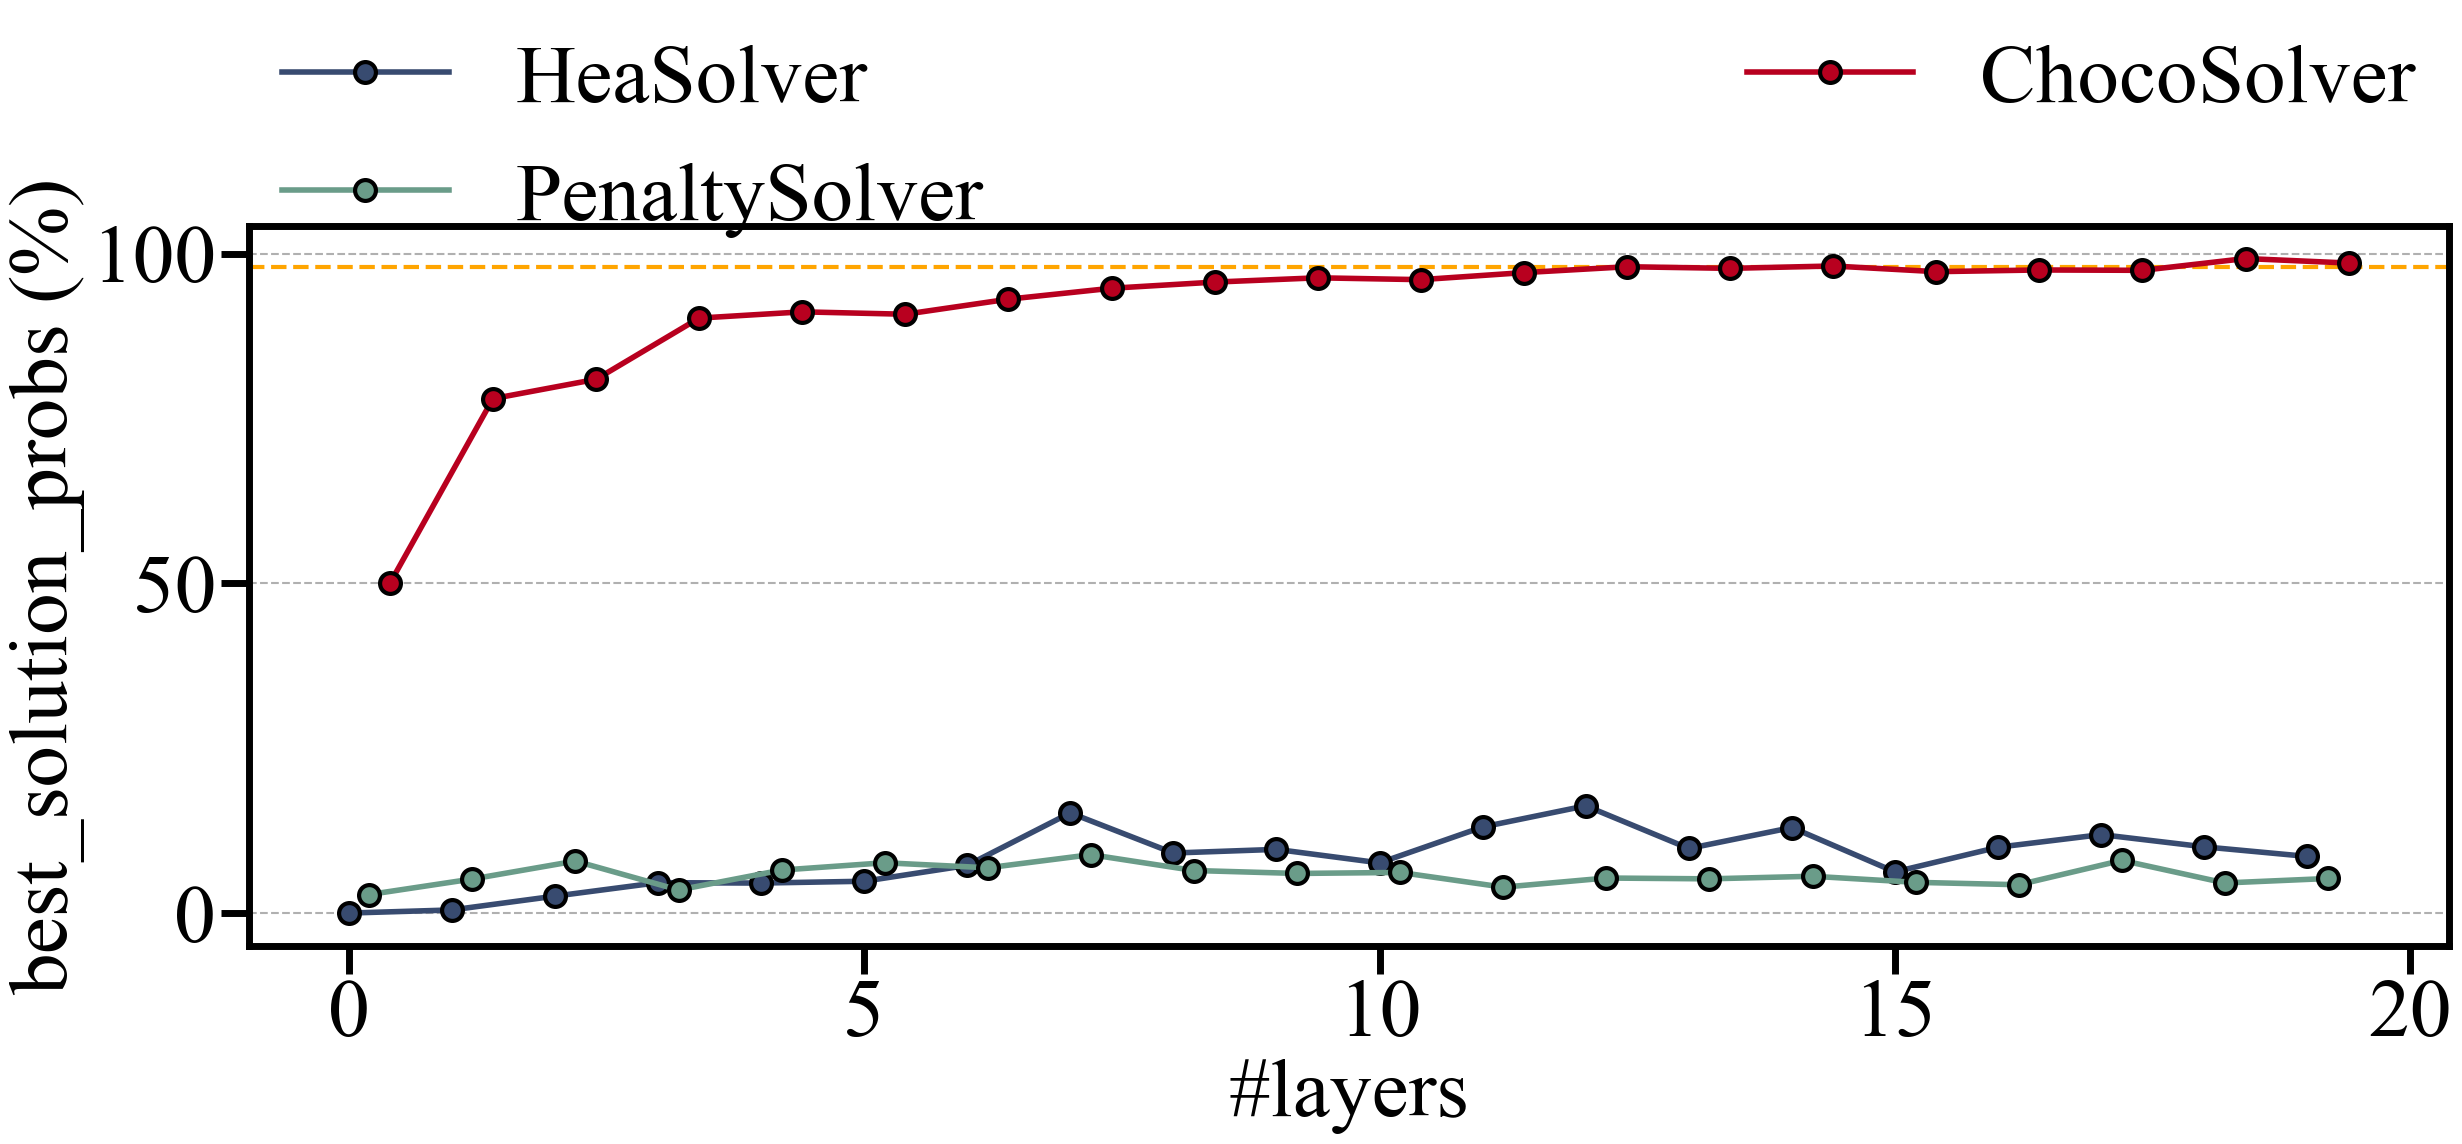

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Initialize the figure and axis settings
scale = 1
fig = plt.figure(figsize=(22*scale, 12*scale))
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 60,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 4,
    "markers.fillstyle" :  'full',
    'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})

ax = plt.axes((0, 0, 1, 0.6))  

colors = ['#384B70','#6A9C89','#B8001F']
ax.axhline(y=98, color='orange', linestyle='--', linewidth=3)
for idx, method in enumerate(['HeaSolver', 'PenaltySolver', 'ChocoSolver']):
    data = grouped_df[grouped_df.method == method]
    x = np.arange(len(data.pkid))
    y = data['best_solution_probs'].to_list()
    print(y)
    # y = y + [np.mean(y)]  # Adding the mean as the last point
    # print(y)
    # Plotting the line with markers (line color same as marker color, and bigger markers)
    ax.plot(x + idx * 0.2, y, marker='o', markersize=15, color=colors[idx], label=method, 
            linestyle='-', linewidth=4, markeredgewidth=3, markerfacecolor=colors[idx], markeredgecolor='black')
ax.grid(True, linestyle='--', linewidth=1.5, axis='y')

# Set the x-axis labels and title
plt.xlabel('#layers')
plt.ylabel('best_solution_probs (%)')

# Customizing the legend
plt.legend(loc='upper left', ncol=2, frameon=False, bbox_to_anchor=(0, 1.1, 1, 0.2), mode="expand", borderaxespad=0)

plt.savefig('best_solution_probs_line_chart.svg', bbox_inches='tight')
